In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [6]:
# pip install yfinance

In [9]:
stocks=input("Enter the co-e of the stock:- ")
data=yf.download(stocks, "2008-01-01","2021-01-18", auto_adjust=True)
data.head()

Enter the co-e of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [10]:
data.shape

(3282, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


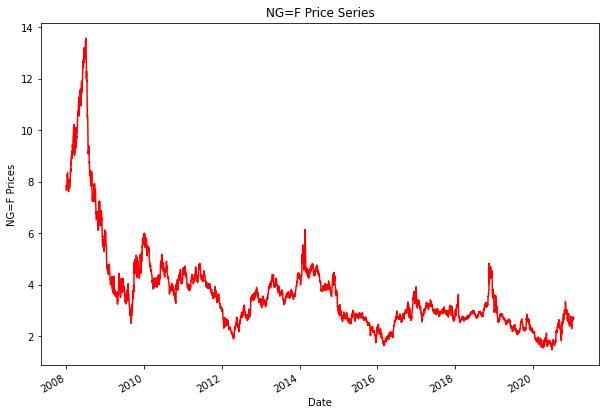

In [13]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

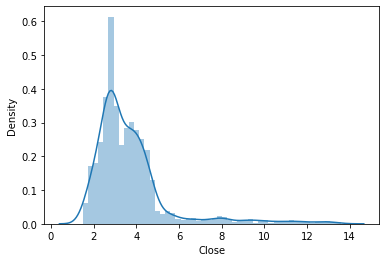

In [14]:
sns.distplot(data['Close'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

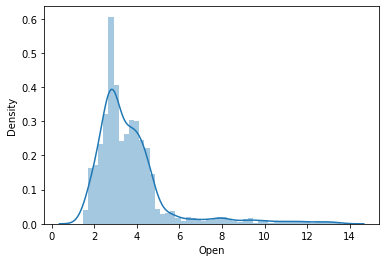

In [15]:
sns.distplot(data['Open'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

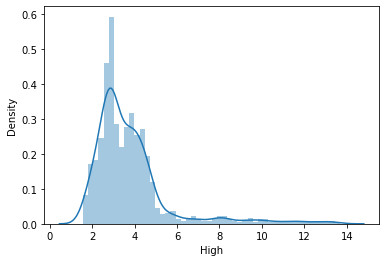

In [16]:
sns.distplot(data['High'])

In [18]:
#Conclusion
# --shape of the data
# --how our data is distributed
# -- it is very very non normal
#Linear,Logistic,Regularized,SVM

In [20]:
X=data.drop('Close',axis=1)
y=data['Close']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [24]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
pred1=lr.predict(X_test)

In [27]:
# pred1

In [28]:
# MSE-->Mean Squared Error
# RMSE-->Root Mean Squared Error
# r2_score-->1.0 #good model


In [31]:
from sklearn.metrics import mean_squared_error,r2_score

def calculate_metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    '''
    y_test:-ground truth
    y_pred:-model predicted
    '''
    rmse=np.sqrt(mse)
    r2_scors=r2_score(y_test,y_pred)
    
    print("MSE:- ",mse)
    print("RMSE:- ",rmse)
    print("R2_Score:- ",r2_scors)
    
calculate_metrics(y_test,pred1)

MSE:-  0.0015345662928848828
RMSE:-  0.039173540724382866
R2_Score:-  0.9994383299702715


In [33]:
from sklearn.linear_model import Lasso,Ridge

la=Lasso().fit(X_train,y_train)
ri=Ridge().fit(X_train,y_train)

la_p=la.predict(X_test)
ri_p=ri.predict(X_test)

In [34]:
calculate_metrics(y_test,la_p)

MSE:-  0.2369233626053289
RMSE:-  0.4867477402159448
R2_Score:-  0.9132831519010186


In [35]:
calculate_metrics(y_test,ri_p)

MSE:-  0.0016151026199613728
RMSE:-  0.040188339353118
R2_Score:-  0.9994088526896658


In [ ]:
#ridge regression will be saved to prone overfitting

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr=SVR()

param_grid={'C':[0,1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.000,],
           'kernel':['rbf']}

grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .........C=0, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=0.01, kernel=r

[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.002 total time=   1.2s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.001 total time=   1.2s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.001 total time=   1.2s
[CV 5/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.006 total time=   1.2s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.2s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.005 total time=   1.2s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.2s
[CV 5/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.004 total time=   1.2s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.012 total time=   1.2s
[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.002 total time=   1.5s
[CV 3/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.008 total time=   1.3s
[CV 4/5] END .....C=100, gam

C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0, 1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [38]:
svr=SVR(C=10,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [40]:
calculate_metrics(y_test,svr_pred)

MSE:-  2.708318452474205
RMSE:-  1.6456969503751913
R2_Score:-  0.00872232580075838


In [43]:
import joblib

joblib.dump(ri,'model.pkl')

ridge_from_joblib=model=joblib.load('model.pkl')